# Práctica 4 de IA

## 0. Explora el cuaderno de Python *demo_german_credit_data.ipynb*

## 1. Construcción de clasificadores en bases de datos sintéticas (2 puntos)

In [1]:
# Fuente:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

def plot_classifiers(classifiers, datasets):
    
    figure = plt.figure(figsize=(4*6, 4*4))
    h = .02  # step size in the mesh
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=.4,
                                                            random_state=42)
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data", fontsize=24)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        
        # iterate over classifiers
        for name, clf in classifiers:
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
            
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name, fontsize=24)
            ax.text(xx.max() - .3, yy.min() + .3, ('Score test: %.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()

In [4]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X @ np.asarray([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

/home/pablo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pablo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


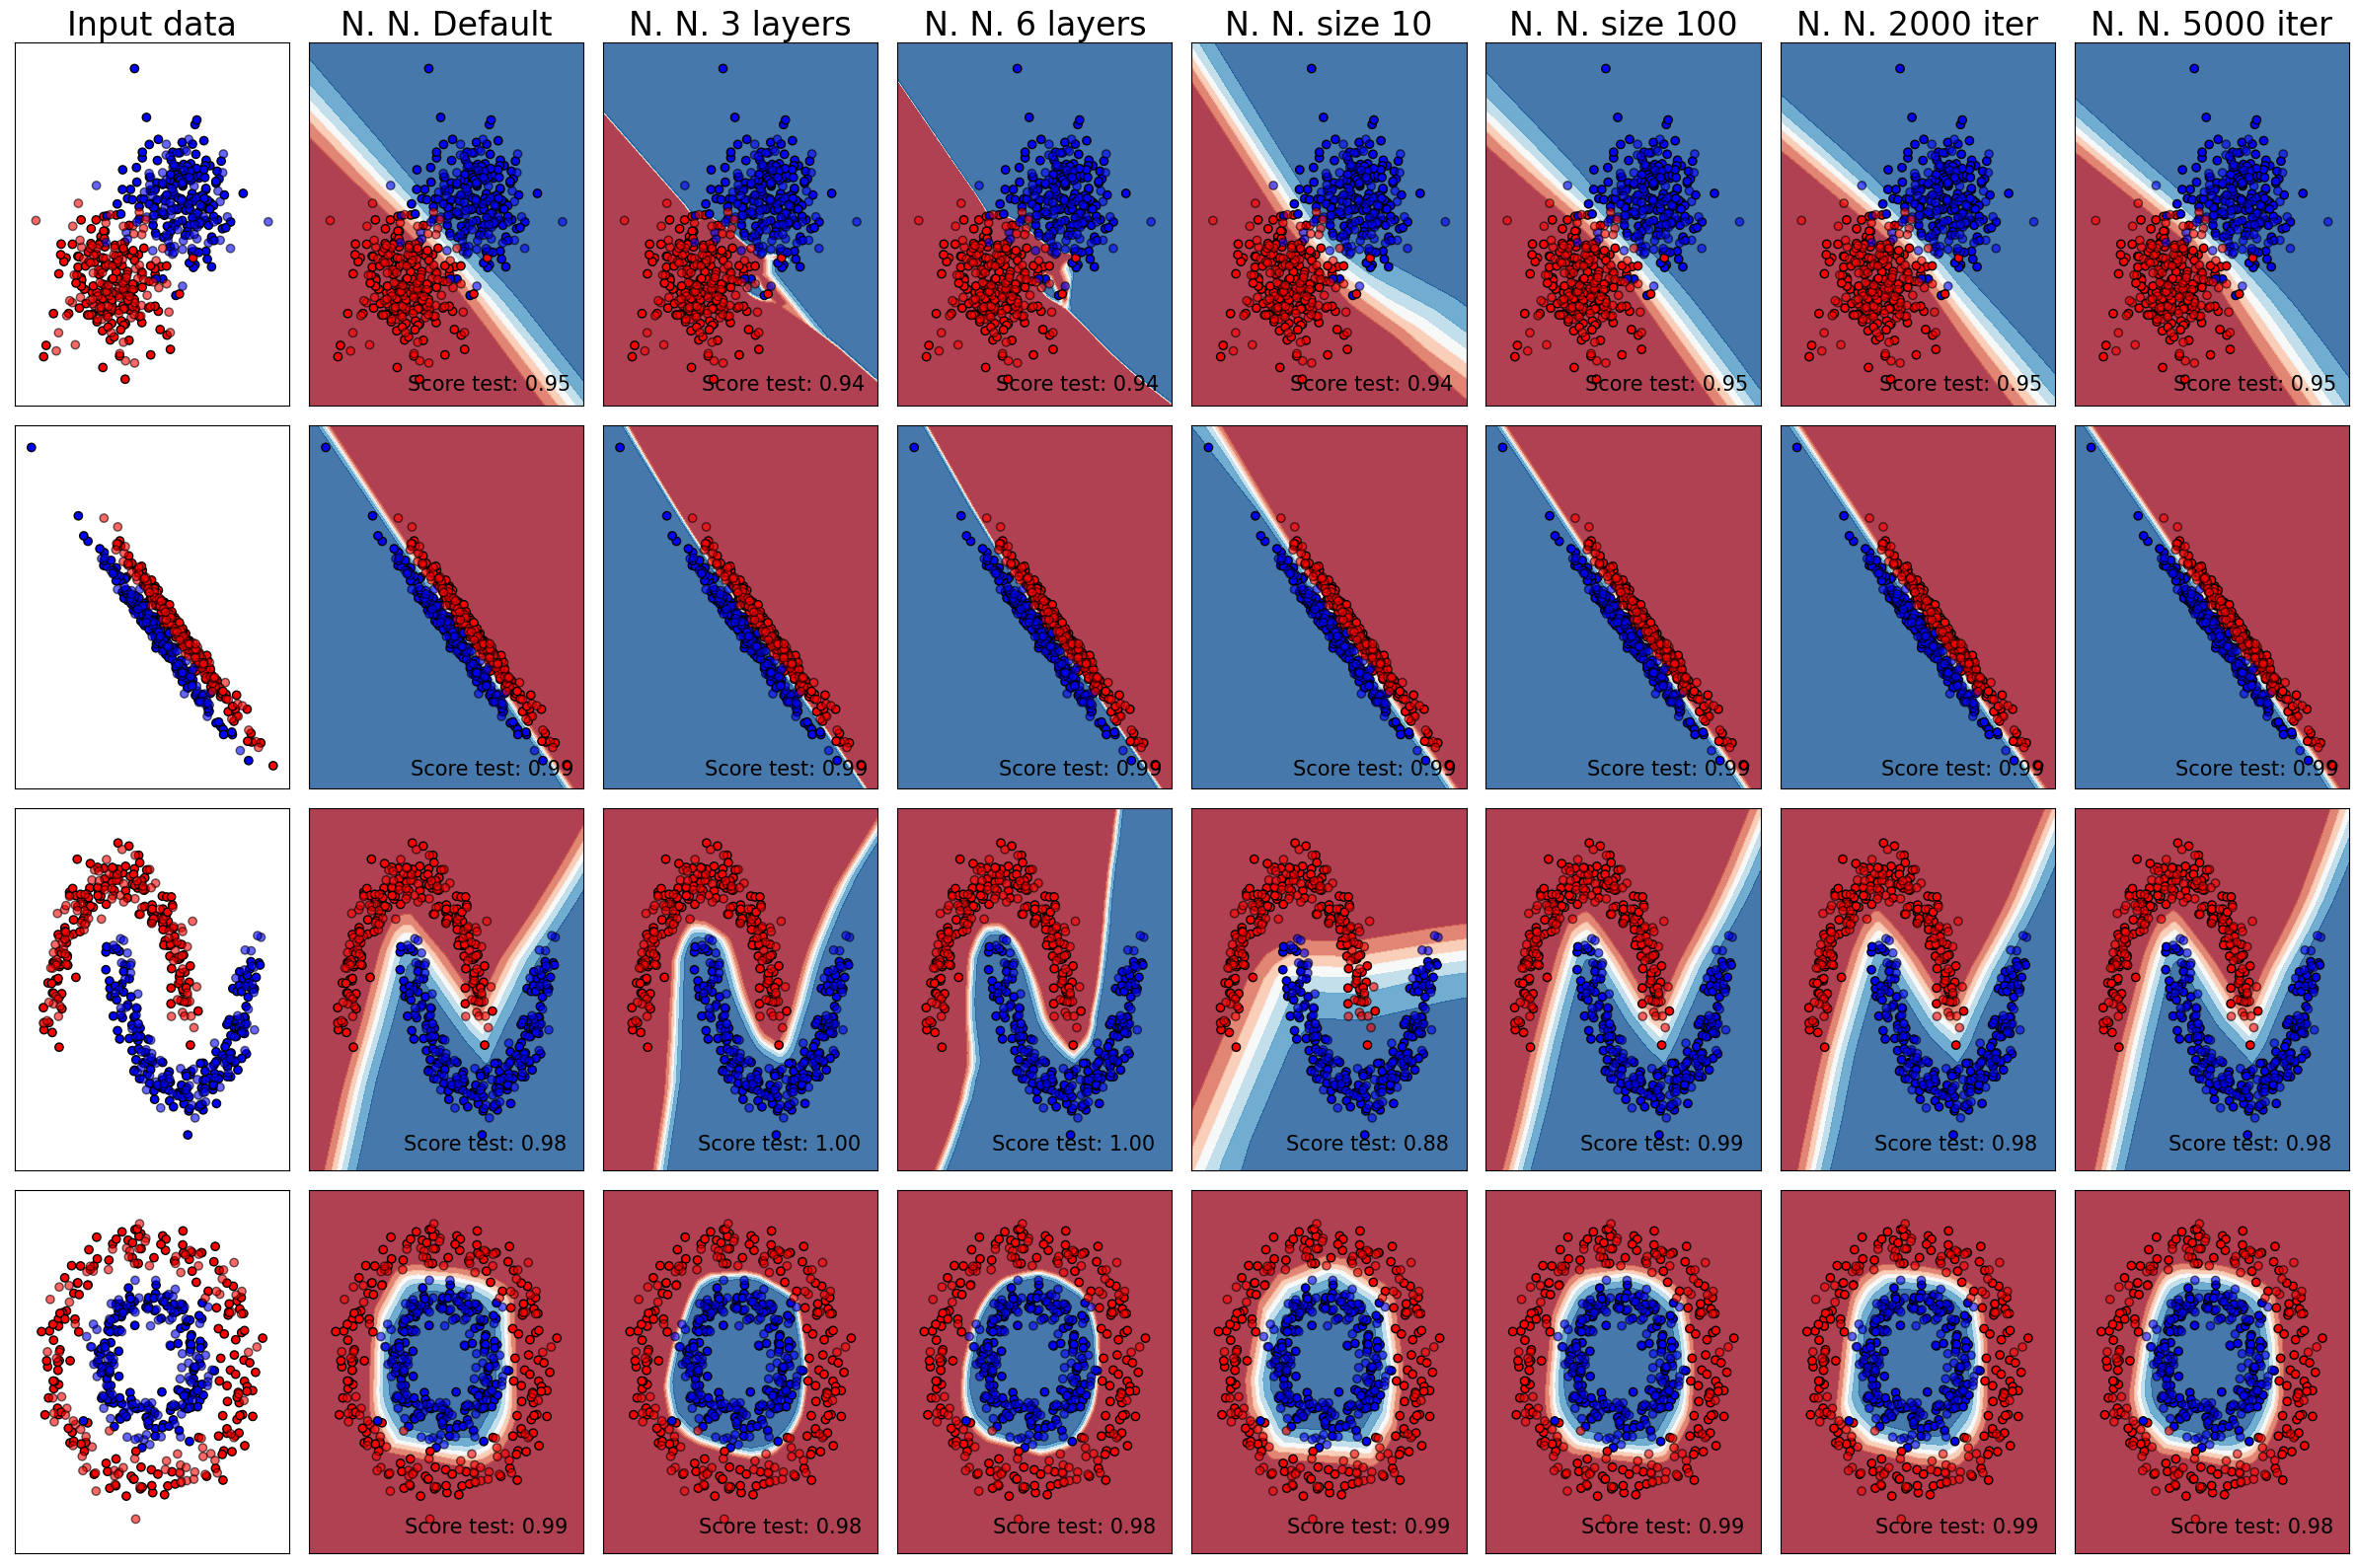

In [7]:
classifiers = [("N. N. Default",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=1000,
                              alpha=0.0)),
               ("N. N. 3 layers",
                MLPClassifier(hidden_layer_sizes=(50, 50, 50),
                              max_iter=1000,
                              alpha=0.0)),
               ("N. N. 6 layers",
                MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50, 50, 50),
                              max_iter=1000,
                              alpha=0.0)),
               ("N. N. size 10",
                MLPClassifier(hidden_layer_sizes=(10,),
                              max_iter=1000,
                              alpha=0.0)),
               ("N. N. size 100",
                MLPClassifier(hidden_layer_sizes=(100,),
                              max_iter=1000,
                              alpha=0.0)),
               ("N. N. 2000 iter",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=2000,
                              alpha=0.0)),
               ("N. N. 5000 iter", MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=5000,
                              alpha=0.0))]

plot_classifiers(classifiers, datasets)

In [6]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

MLPClassifier(alpha=0.0, hidden_layer_sizes=(50,), max_iter=1000)
MLPClassifier(alpha=0.0, hidden_layer_sizes=(50, 50, 50), max_iter=1000)
MLPClassifier(alpha=0.0, hidden_layer_sizes=(50, 50, 50, 50, 50, 50),
              max_iter=1000)
MLPClassifier(alpha=0.0, hidden_layer_sizes=(10,), max_iter=1000)
MLPClassifier(alpha=0.0, max_iter=1000)
MLPClassifier(alpha=0.0, hidden_layer_sizes=(50,), max_iter=2000)
MLPClassifier(alpha=0.0, hidden_layer_sizes=(50,), max_iter=5000)


**Prueba a cambiar los siguientes parámetros (al menos 3-5 variantes en cada caso) y observa las consecuencias en la frontera de clasificación construida:**

* Número de vecinos en k-nn. 
    * ¿Debería ser impar cuando hay dos clases? Justifica la respuesta.
        * **Porque si el valor de 'k' es par, puede darse empates entre clases y no poder obtener resultados por no poder decidir una de las dos clases.**
    * ¿Debería ser impar cuando hay más de dos clases? Justifica la respuesta.
        * **Realmente el tamaño 'k' cuando hay mas de dos clases es trivial, ya que no podemos evitar empates cuando hay mas de dos clases, independientemente del valor de 'k'.**
* Profundidad máxima de los árboles de decisión.
    * **La maxima profundidad de los arboles de decisión es la necesaria para dividir todos los tipos de casos del entrenamiento, por ejemplo, si una pregunta (unnivel del arbol) es capaz de dividir todas las muestras, el arbol tendrá profundidad 1, aunque permita mas profundidad.**
        
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. **Nota:** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.
    * **Hemos realizado un total de 3 tipos de pruebas (2 pruebas por cada tipo): la primera variando el número de capas con un número constante de neuronas (50), el segundo variando el número de neuronas con una capa, y el tercero
    cambiar el número de iteraciones con una unica capa y constante número de neuronas.**
    * **Hemos llegado a la conclusión de que se obtienen mejores aproximaciones y mejor entrenamiento cuanto mas compleja es la red neuronal (más neuronas, capas e iteraciones)**
